Web Scraping Zara: Extracting Product Data using Python & Selenium

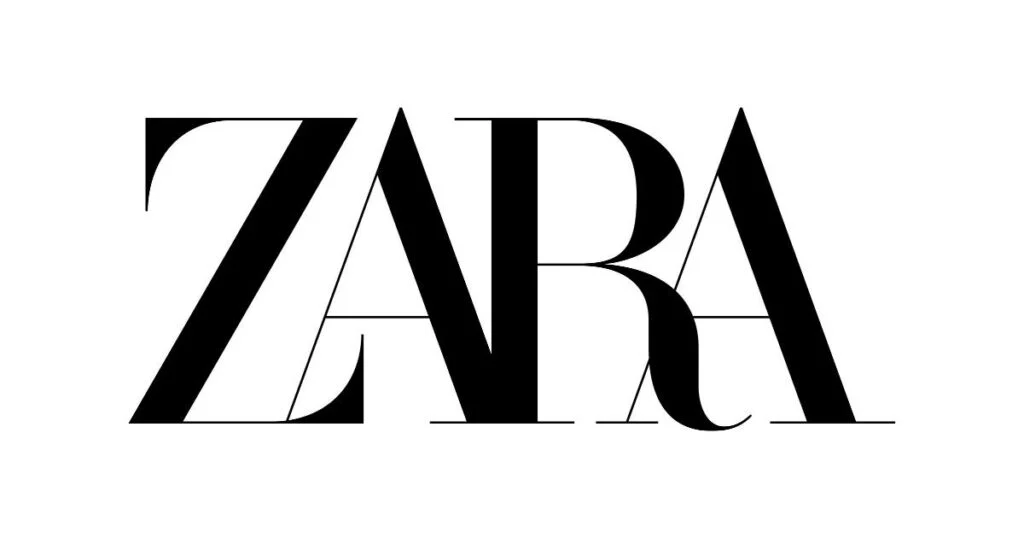

In [ ]:
# Importing the required libraries
from selenium import webdriver
from time import sleep
from csv import writer
from selenium.webdriver.common.by import By
chrome_driver_path = r"C:\Users\Dell\Downloads\chromedriver_win32\chromedriver.exe"
driver = webdriver.Chrome(executable_path=chrome_driver_path)

driver.get('https://www.zara.com/us/en/search?searchTerm=women%20jackets&section=WOMAN')
driver.maximize_window()
height = driver.execute_script("return document.body.scrollHeight")
whileTrue:
   driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
   sleep(5)
   new_height = driver.execute_script("return document.body.scrollHeight")
if height == new_height:
break
   height = new_height
    product_links = []

# Getting the product elements
page_product_links = driver.find_elements(By.XPATH, '//div[@class="product-grid-product__figure"]/a')

# Getting the product links
for product in page_product_links:
   product_link = product.get_attribute('href')
   product_links.append(product_link)
    # Extracting product name
defget_product_name():
try:
       product_name = driver.find_element(By.XPATH, '//h1[@class="product-detail-info__header-name"]').text
except Exception as e:
       product_name = "Not available"
return product_name

# Extracting product mrp
defget_mrp():
try:
       mrp = driver.find_element(By.XPATH, '//span[@class="money-amount__main"]').text
except Exception as e:
       mrp = "Not available"
return mrp

# Extracting product color
defget_color():
try:
       color = driver.find_element(By.XPATH, '//p[@class="product-color-extended-name product-detail-info__color"]').text
except Exception as e:
       color = "Not available"
return color

# Extracting product description
defget_desc():
try:
       desc = driver.find_element(By.XPATH, '//div[@class="expandable-text__inner-content"]/p').text
except Exception as e:
       desc = "Not available"
return desc
with open('women_jacket_data.csv','w',newline='', encoding='utf-8') as f:
   theWriter = writer(f)
   heading = ['product_url', 'product_name', 'mrp', 'color', 'description']
   theWriter.writerow(heading)
for product in product_links:
       driver.get(product)
       sleep(5)
       product_name = get_product_name()
       sleep(3)
       mrp = get_mrp()
       sleep(3)
       color = get_color()
       sleep(3)
       desc = get_desc()
       sleep(3)
       record = [product, product_name, mrp, color, desc]
       theWriter.writerow(record)

driver.quit()